In [5]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp
import math
import scipy
import seaborn as sns
import os 

In [6]:
import glob
from PIL import Image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
#glob.glob('subject01/**/!(*.test).gif')
train_1 = ['subject01.happy.gif','subject01.glasses.gif','subject01.leftlight.gif','subject01.noglasses.gif','subject01.normal.gif','subject01.rightlight.gif','subject01.sad.gif','subject01.sleepy.gif','subject01.surprised.gif','subject01.wink.gif',]
train_2 = ['subject02.happy.gif','subject02.glasses.gif','subject02.leftlight.gif','subject02.noglasses.gif','subject02.normal.gif','subject02.rightlight.gif','subject02.sad.gif','subject02.sleepy.gif','subject02.wink.gif',]
test_1 = ['subject01-test.gif']
test_2 = ['subject02-test.gif']
a = 2


In [7]:
dataset_path = 'yalefaces/'
dataset_dir  = os.listdir(dataset_path)

width  = 80
height = 61
#width  = 243
#height = 320

In [8]:
training_tensor   = np.ndarray(shape=(len(train_1), height*width), dtype=np.float64)

C:\Users\rebec\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


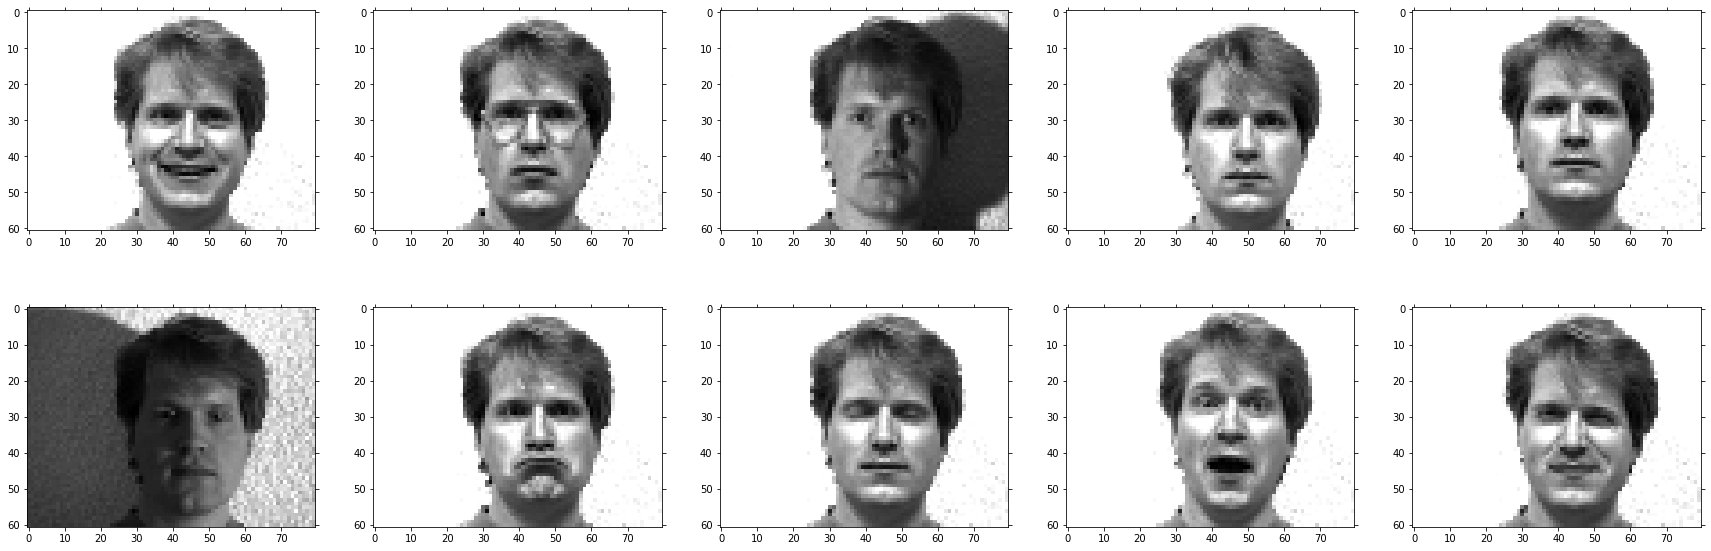

In [10]:
fig=plt.figure(figsize=(30, 10))
# Loading and resizing images for subject 1
plt.title('Resized training images for subject 01')

for i in range(len(train_1)):
    
    img = plt.imread(dataset_path + train_1[i])
    im = rescale(img, 0.25, anti_aliasing=False)
    #training_tensor[i,:] = np.array(im, dtype='float64').flatten()

    training_tensor[i,:] = np.array(im, dtype='float64').flatten()
    
    plt.subplot(2,5,1+i)
    plt.imshow(im, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.savefig('HW2_Q3_training_sub01.png')
plt.show()

(1, 4880)


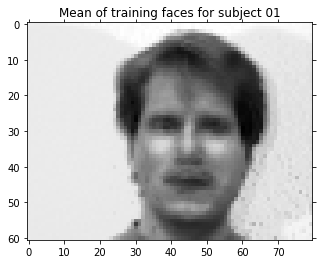

In [11]:
#meanfaces for subject 1
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)
print(mean_face.shape)
mean_face = np.divide(mean_face,float(len(train_1))).flatten()
img = np.reshape(mean_face, (61,80))
plt.imshow(img, cmap='gray')
plt.title('Mean of training faces for subject 01')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.savefig('HW2_Q3_meanface_sub01.png')
plt.show()

In [12]:
#normalising subject 1 data by substracting the mean
normalised_training_tensor = np.ndarray(shape=(len(train_1), 80*61))

for i in range(len(train_1)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

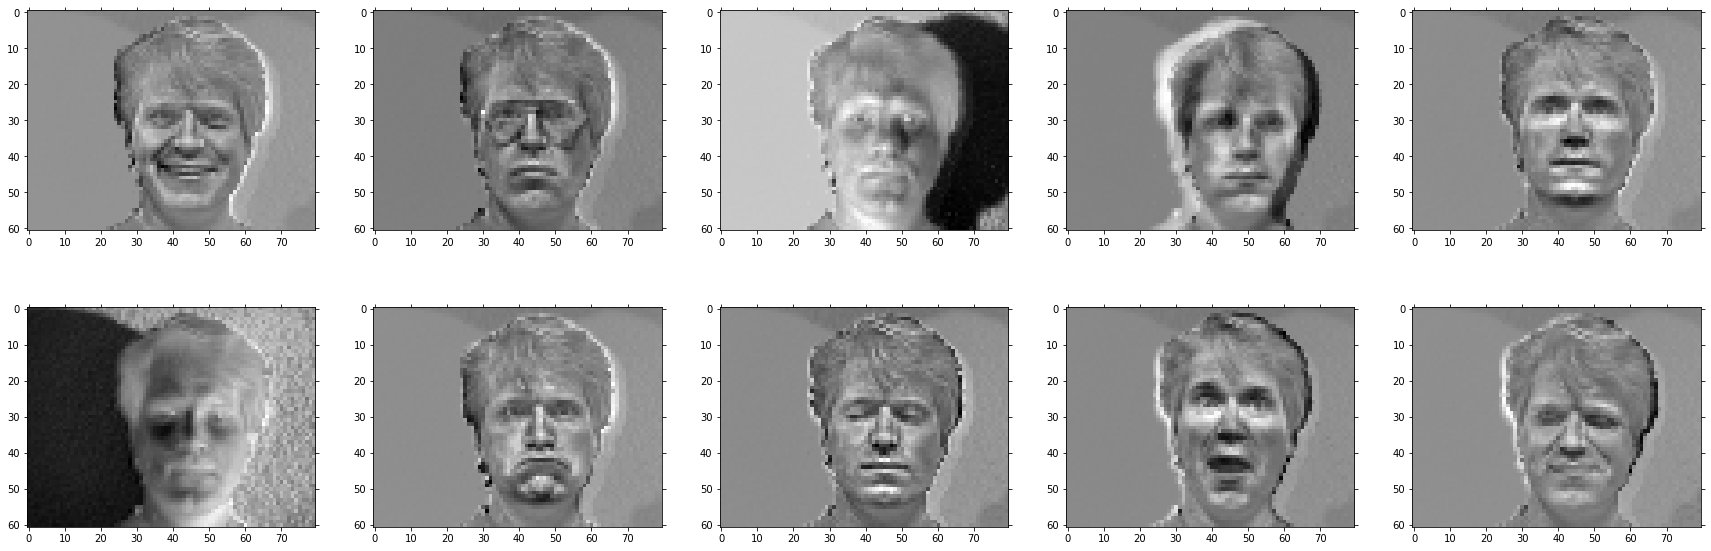

In [15]:
fig=plt.figure(figsize=(30, 10))
plt.title('Normalised faces for subject 01')
#Display normalised images for subject 1
for i in range(len(train_1)):
    img = normalised_training_tensor[i].reshape(61,80)
    plt.subplot(2,5,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')

plt.savefig('HW2_Q3_normalisedface_sub01.png')
plt.show()

cov_matrix = np.cov(normalised_training_tensor)
#cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

import scipy.sparse.linalg as ll
v, x, = np.linalg.eig(cov_matrix)
#v, x = ll.eigs(cov_matrix)
idx = np.argsort(-v)   
v = v[idx]
x = x[:,idx]
v = np.delete(v, 3)
x = np.delete(x, 3, 0)
print('Eigenvectors of Cov(X): \n%s' %x)
print('\nEigenvalues of Cov(X): \n%s' %v)

eig_pairs = [(v[index], x[:,index]) for index in range(1)]

reduced_data = np.array(x[:6]).transpose()
reduced_data.shape

proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

In [16]:
K = 2
import math
##### NEW TRY
C_new = np.cov(normalised_training_tensor)
#C_new = np.cov(training_tensor)

#Lock the initialization v0
#S,W = ll.eigs(C,k = K,v0 = np.ones(20))
eigen_values, eigen_vectors = np.linalg.eig(C_new)
idx = np.argsort(-eigen_values)   
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]
reduced_data = np.array(eigen_vectors[:6]).transpose()
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()


dim1 = np.dot(training_tensor.T,eigen_vectors[:,0])/math.sqrt(eigen_values[0])
dim2 = np.dot(training_tensor.T,eigen_vectors[:,1])/math.sqrt(eigen_values[1])
dim3 = np.dot(training_tensor.T,eigen_vectors[:,2])/math.sqrt(eigen_values[2])
dim4 = np.dot(training_tensor.T,eigen_vectors[:,3])/math.sqrt(eigen_values[3])
dim5 = np.dot(training_tensor.T,eigen_vectors[:,4])/math.sqrt(eigen_values[4])
dim6 = np.dot(training_tensor.T,eigen_vectors[:,5])/math.sqrt(eigen_values[5])
#dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1])


#dim1 = dim1.real
#dim2 = dim2.real
print(eigen_values)

[ 1.43609552e-01  4.53604197e-02  2.83778009e-02  1.52669828e-02
  1.01666578e-02  5.52515451e-03  3.72738759e-03  3.41477122e-03
  2.26256603e-03 -1.50504149e-18]


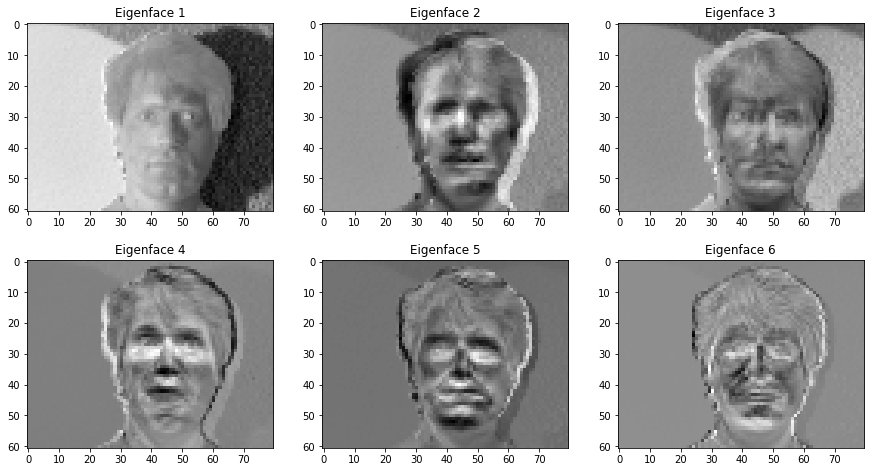

In [20]:
img1 = dim1.reshape(61,80)
img2 = dim2.reshape(61,80)
img3 = dim3.reshape(61,80)
img4 = dim4.reshape(61,80)
img5 = dim5.reshape(61,80)
img6 = dim6.reshape(61,80)

#plt.imshow(img, cmap='gray')

f, axarr = plt.subplots(2,3, figsize=(15, 8))

axarr[0,0].imshow(img1, cmap='gray')
axarr[0,1].imshow(img2, cmap='gray')
axarr[0,2].imshow(img3, cmap='gray')
axarr[1,0].imshow(img4, cmap='gray')
axarr[1,1].imshow(img5, cmap='gray')
axarr[1,2].imshow(img6, cmap='gray')
axarr[0,0].set_title('Eigenface 1')
axarr[0,1].set_title('Eigenface 2')
axarr[0,2].set_title('Eigenface 3')
axarr[1,0].set_title('Eigenface 4')
axarr[1,1].set_title('Eigenface 5')
axarr[1,2].set_title('Eigenface 6')
plt.savefig('HW2_Q3_eigenface_sub01.png')

In [21]:
#load subject2
training_tensor_2   = np.ndarray(shape=(len(train_2), height*width), dtype=np.float64)

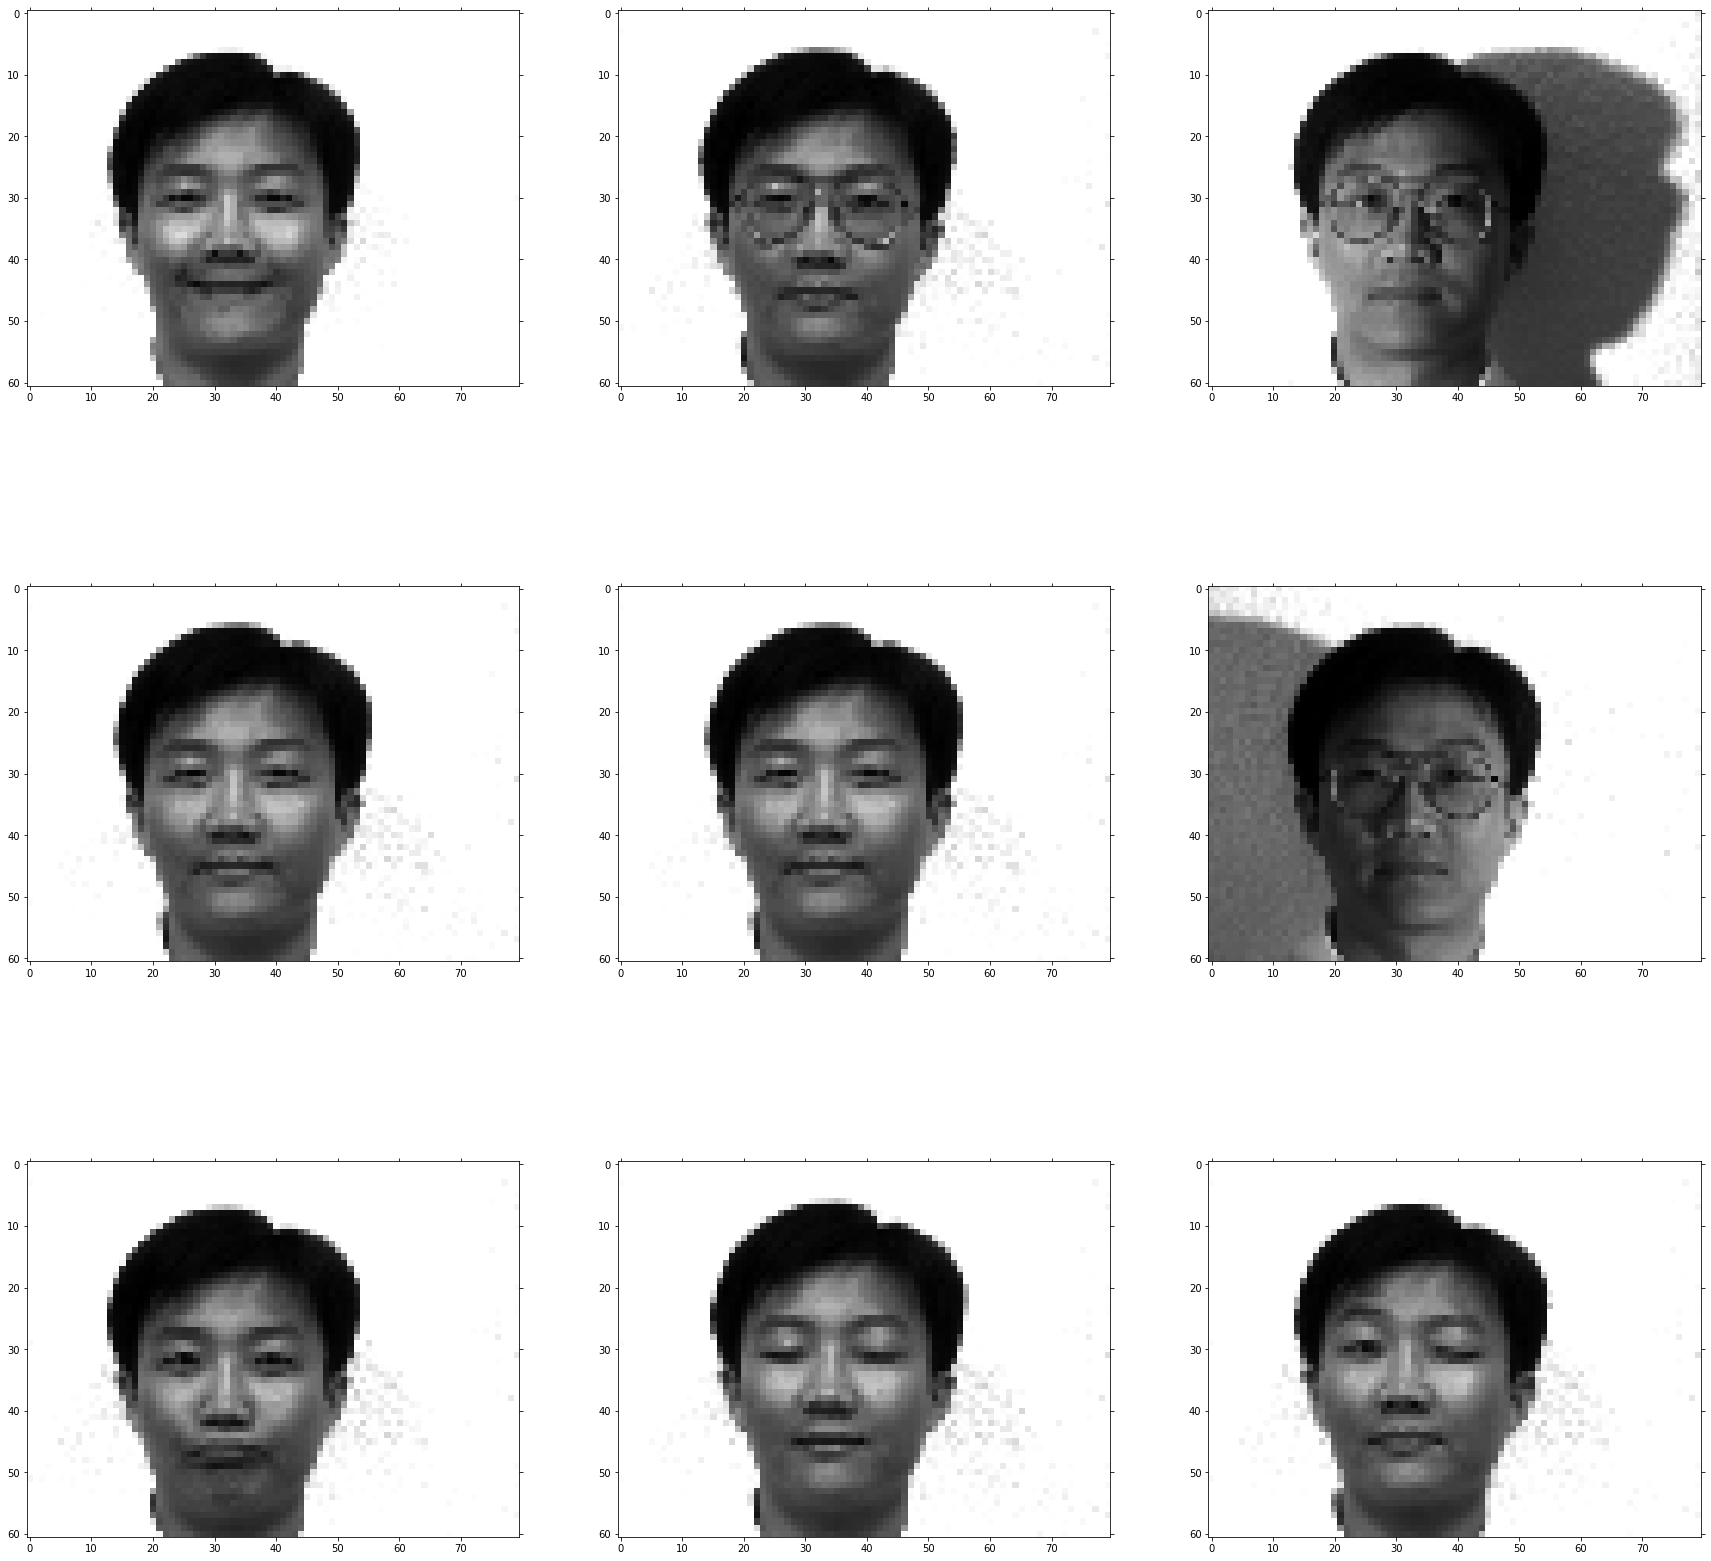

In [22]:
fig=plt.figure(figsize=(30, 30))
# resize subject 2 images
for i in range(len(train_2)):
    
    img = plt.imread(dataset_path + train_2[i])
    im = rescale(img, 0.25, anti_aliasing=False)
    #training_tensor[i,:] = np.array(im, dtype='float64').flatten()
    #print(im.shape)
    training_tensor_2[i,:] = np.array(im, dtype='float64').flatten()
    
    plt.subplot(3,3,1+i)
    plt.imshow(im, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.savefig('HW2_Q3_training_sub02.png')
plt.show()

(1, 4880)


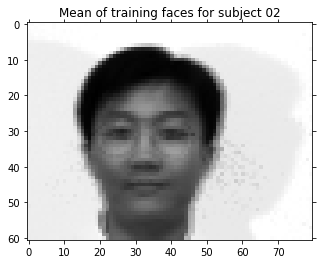

In [23]:
#meanfaces for subject 2
mean_face_2 = np.zeros((1,height*width))

for i in training_tensor_2:
    mean_face_2 = np.add(mean_face_2,i)
print(mean_face_2.shape)
mean_face_2 = np.divide(mean_face_2,float(len(train_2))).flatten()
img = np.reshape(mean_face_2, (61,80))
plt.imshow(img, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.title('Mean of training faces for subject 02')

plt.savefig('HW2_Q3_meanface_sub02.png')
plt.show()

In [24]:
#normalising subject 1 data by substracting the mean
normalised_training_tensor_2 = np.ndarray(shape=(len(train_2), 80*61))

for i in range(len(train_2)):
    normalised_training_tensor_2[i] = np.subtract(training_tensor_2[i],mean_face_2)

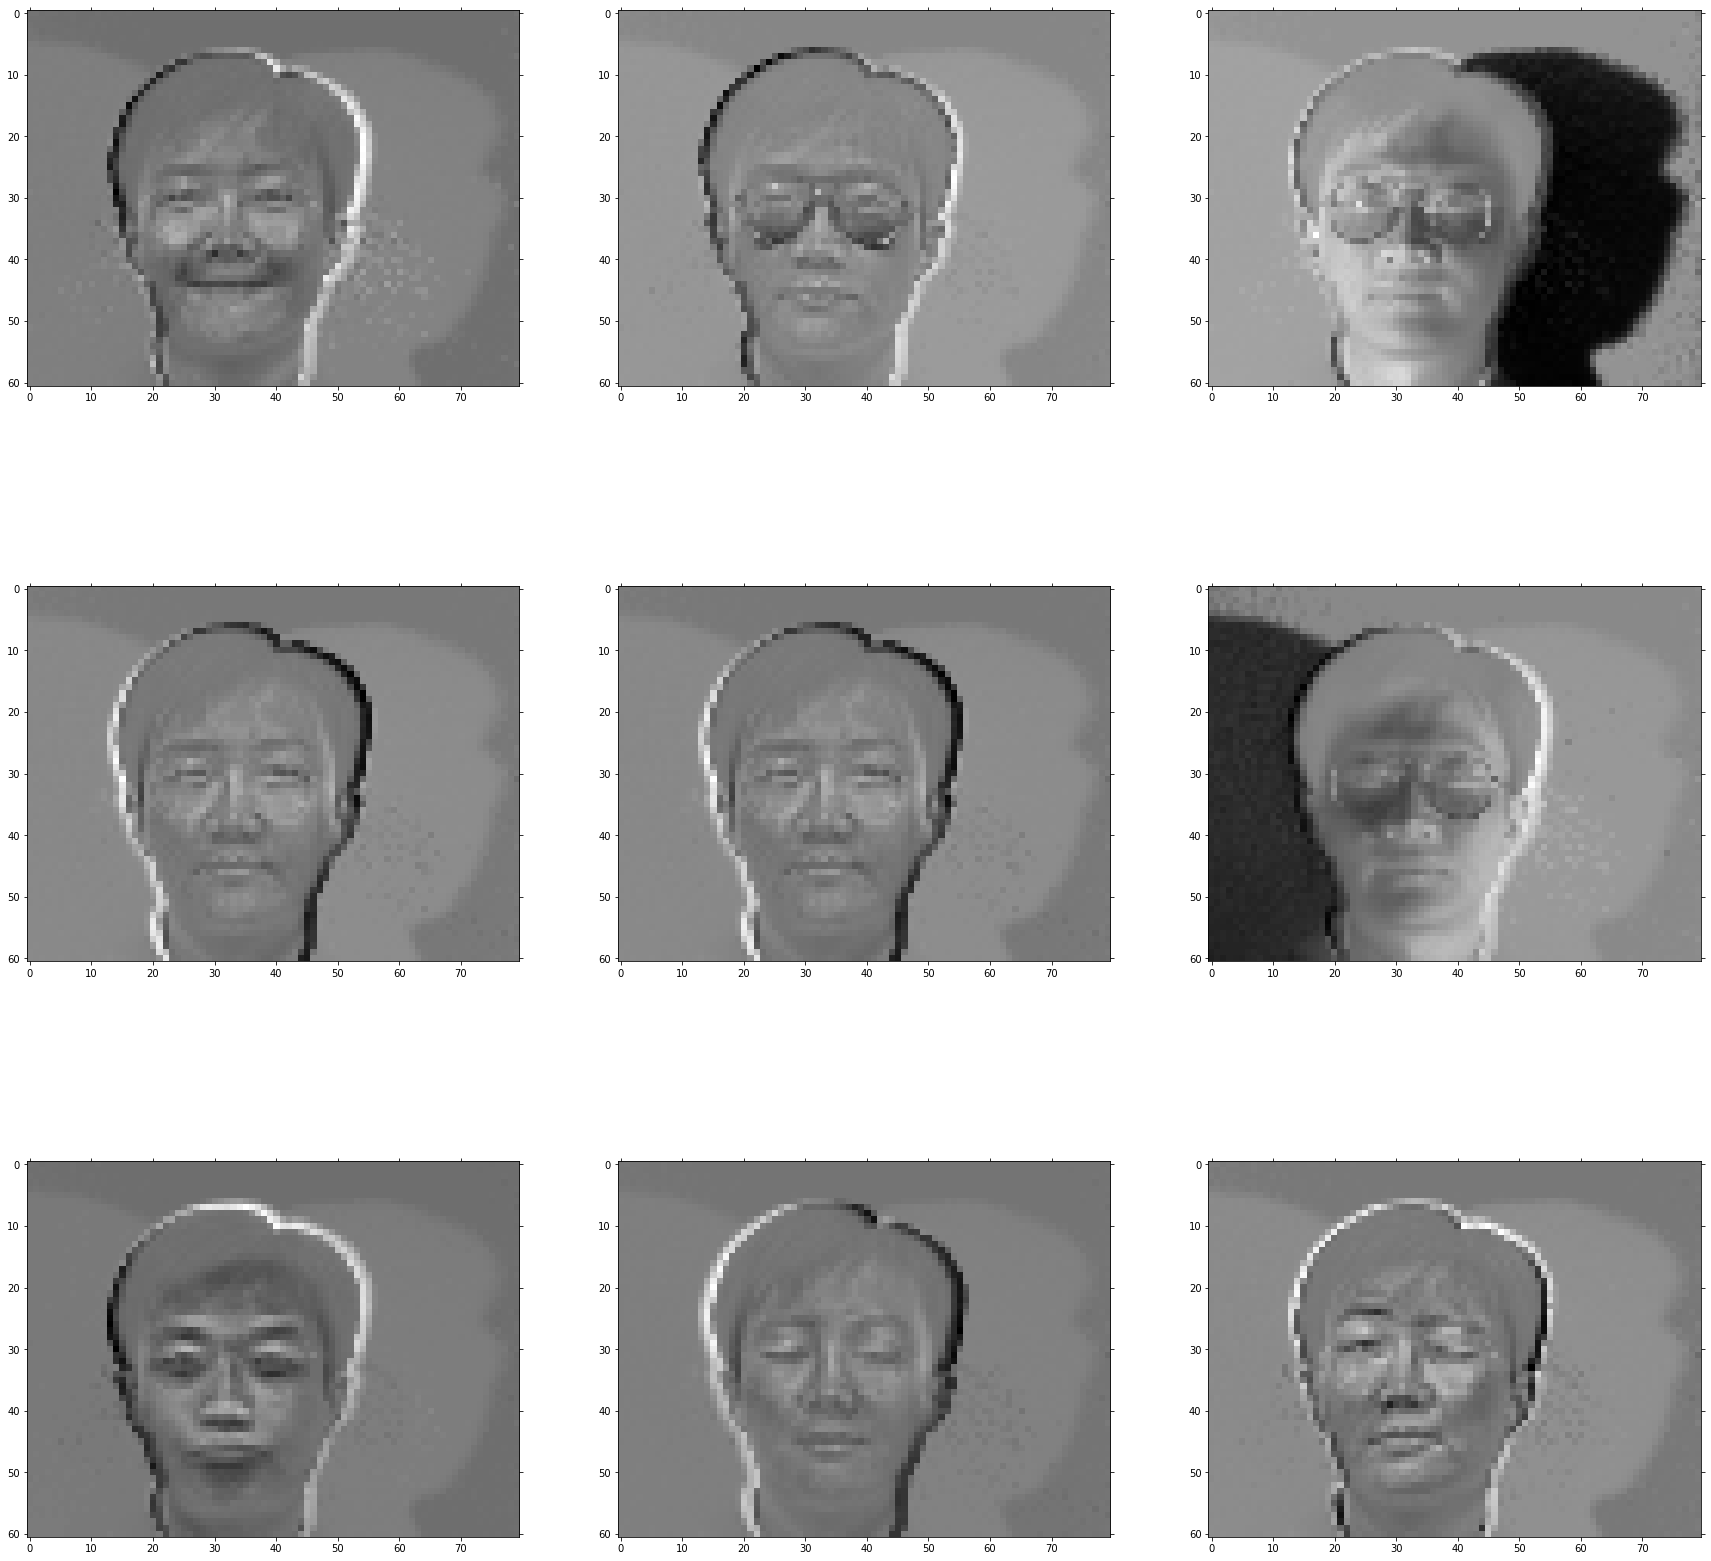

In [25]:
fig=plt.figure(figsize=(30, 30))
#Display normalised images for subject 1
for i in range(len(train_2)):
    img = normalised_training_tensor_2[i].reshape(61,80)
    plt.subplot(3,3,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.savefig('HW2_Q3_normalisedface_sub02.png')
plt.show()

In [26]:
import math
##### NEW TRY
C_new_2 = np.cov(normalised_training_tensor_2)
#Lock the initialization v0
#S,W = ll.eigs(C,k = K,v0 = np.ones(20))
eigen_values_2, eigen_vectors_2 = np.linalg.eig(C_new_2)
idx = np.argsort(-eigen_values_2)   
eigen_values_2 = eigen_values_2[idx]
eigen_vectors_2 = eigen_vectors_2[:,idx]
reduced_data_2 = np.array(eigen_vectors_2[:6]).transpose()
proj_data_2 = np.dot(training_tensor_2.transpose(),reduced_data_2)
proj_data_2 = proj_data_2.transpose()


dim1_2= np.dot(training_tensor_2.T,eigen_vectors_2[:,0])/math.sqrt(eigen_values_2[0])
dim2_2 = np.dot(training_tensor_2.T,eigen_vectors_2[:,1])/math.sqrt(eigen_values_2[1])
dim3_2 = np.dot(training_tensor_2.T,eigen_vectors_2[:,2])/math.sqrt(eigen_values_2[2])
dim4_2 = np.dot(training_tensor_2.T,eigen_vectors_2[:,3])/math.sqrt(eigen_values_2[3])
dim5_2 = np.dot(training_tensor_2.T,eigen_vectors_2[:,4])/math.sqrt(eigen_values_2[4])
dim6_2 = np.dot(training_tensor_2.T,eigen_vectors_2[:,5])/math.sqrt(eigen_values_2[5])
#dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1])


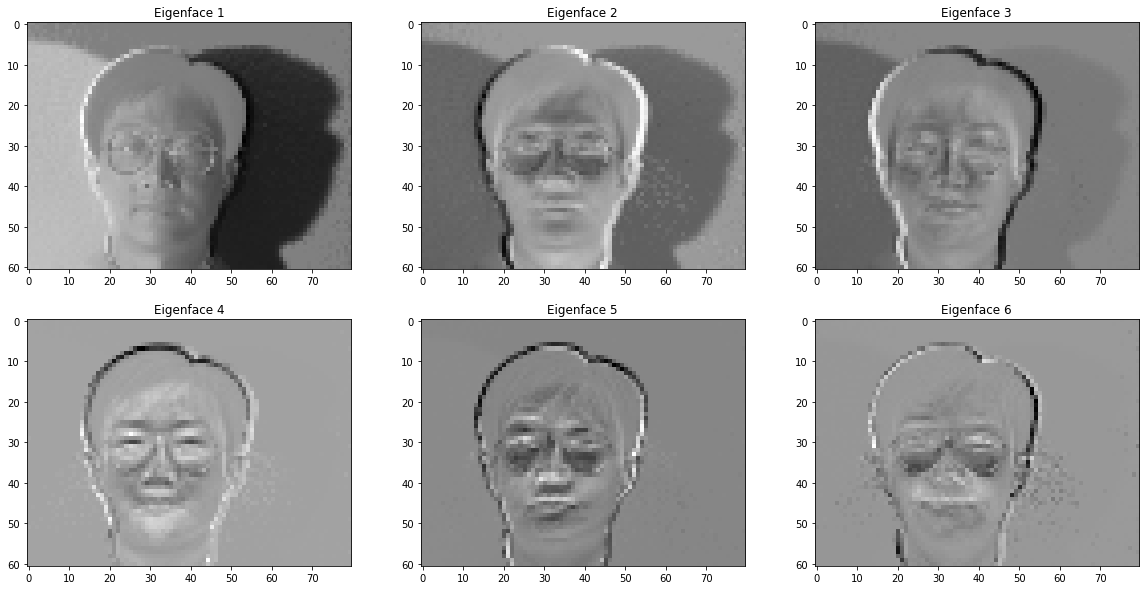

In [28]:
img1_2 = dim1_2.reshape(61,80)
img2_2 = dim2_2.reshape(61,80)
img3_2 = dim3_2.reshape(61,80)
img4_2 = dim4_2.reshape(61,80)
img5_2 = dim5_2.reshape(61,80)
img6_2 = dim6_2.reshape(61,80)

#plt.imshow(img, cmap='gray')

f, axarr = plt.subplots(2,3, figsize=(20, 10))

axarr[0,0].imshow(img1_2, cmap='gray')
axarr[0,1].imshow(img2_2, cmap='gray')
axarr[0,2].imshow(img3_2, cmap='gray')
axarr[1,0].imshow(img4_2, cmap='gray')
axarr[1,1].imshow(img5_2, cmap='gray')
axarr[1,2].imshow(img6_2, cmap='gray')
axarr[0,0].set_title('Eigenface 1')
axarr[0,1].set_title('Eigenface 2')
axarr[0,2].set_title('Eigenface 3')
axarr[1,0].set_title('Eigenface 4')
axarr[1,1].set_title('Eigenface 5')
axarr[1,2].set_title('Eigenface 6')
plt.savefig('HW2_Q3_eigenface_sub02.png')

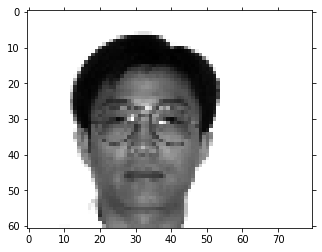

In [29]:
#Read test data
test1 = plt.imread(dataset_path + test_1[0])
test1 = rescale(test1, 0.25, anti_aliasing=False)
#training_tensor[i,:] = np.array(im, dtype='float64').flatten()
#print(test1.shape)
#Subject1 test image
test1 = np.array(test1, dtype='float64').flatten()

test2 = plt.imread(dataset_path + test_2[0])
test2 = rescale(test2, 0.25, anti_aliasing=False)
#training_tensor[i,:] = np.array(im, dtype='float64').flatten()
#print(test2.shape)
#Subject1 test image
plt.imshow(test2, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()
test2 = np.array(test2, dtype='float64').flatten()


In [30]:
# L2 norm values of test images and top eigenface
normdim1 = np.linalg.norm(dim1)
normtest1 = np.linalg.norm(test1)
normdim2 = np.linalg.norm(dim1_2)
normtest2 = np.linalg.norm(test2)

In [31]:
#i=1, j=1 , first subject eigenface and first subject test image score
S_1_1 = np.dot(dim1.transpose(),test1)/ (normtest1*normdim1)
print(S_1_1)

0.32540056600338635


In [32]:
#i=1, j=2 , first subject eigenface and second subject test image score
S_1_2 = np.dot(dim1.transpose(),test2)/ (normtest2*normdim1)
print(S_1_2)

0.0710438757077751


In [33]:
#i=2, j=1 , first subject eigenface and first subject test image score
S_2_1 = np.dot(dim1_2.transpose(),test1)/ (normtest1*normdim2)
print(S_2_1)

0.047728504551700926


In [34]:
S_2_2 = np.dot(dim1_2.transpose(),test2)/ (normtest2*normdim2)
print(S_2_2)

-0.2720682018591915


In [38]:
test1_score =1 - scipy.spatial.distance.cosine(dim1_2, test2, w=None)
print(test1_score)

-0.27206820185919156


In [36]:
test2_score =1 - scipy.spatial.distance.cosine(dim1_2, test1, w=None)
print(test2_score)

0.04772850455170086


In [37]:
test3_score =1- scipy.spatial.distance.cosine(dim1, test1, w=None)
print(test3_score)
test4_score =1- scipy.spatial.distance.cosine(dim1, test2, w=None)
print(test4_score)

0.3254005660033864
0.07104387570777515
